# Challenge 2

In [8]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('data/titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [10]:
titanic.select_dtypes(np.number) # columnas numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [12]:
titanic.select_dtypes(object) # columnas categoricas

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [50]:
plt.rcParams["figure.figsize"] = (12,6)
plt.style.use("ggplot") 

#### Use the appropriate visulalization to show the distribution of the column `Age`

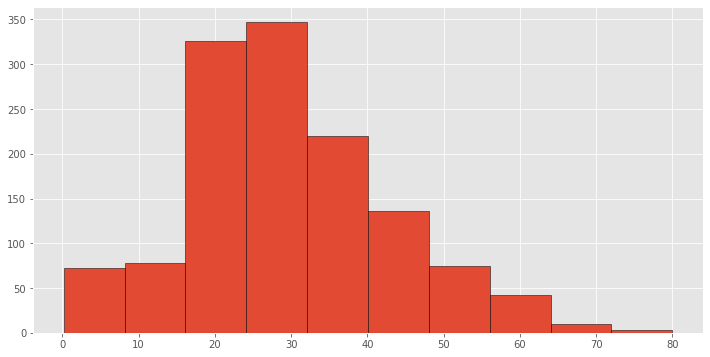

In [57]:
plt.hist(titanic['Age'], edgecolor = "black")
plt.show()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

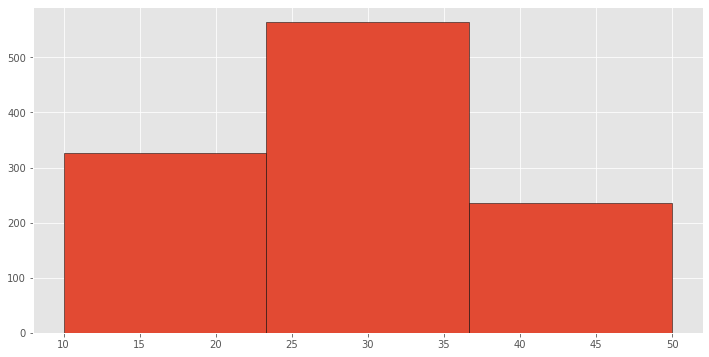

In [59]:
plt.hist(titanic['Age'], bins = 3, range = (10, 50), edgecolor = "black")
plt.show()

#### Whether the bin size affects your plot? Why?

Se agrupan las edades entres los diferentes segmentos

#### Use seaborn to show the distribution of the column `Age`

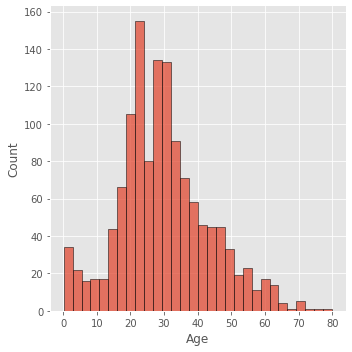

In [60]:
sns.displot(titanic['Age'], edgecolor = "black")

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

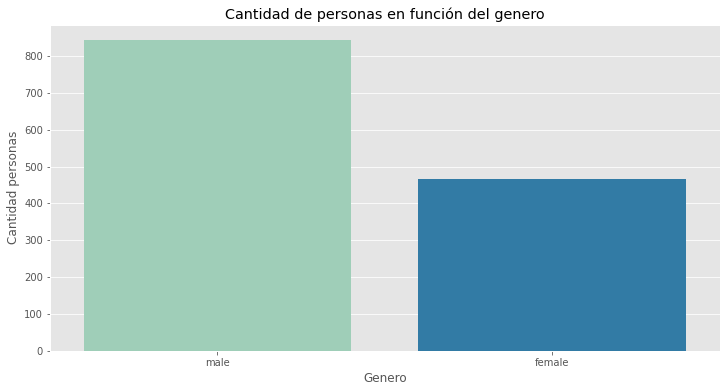

In [78]:
gender_titanic = titanic["Gender"].value_counts().reset_index()

sns.barplot(data=gender_titanic, x='index', y='Gender', ci= None, palette = "YlGnBu")

plt.title("Cantidad de personas en función del genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad personas")
plt.show()

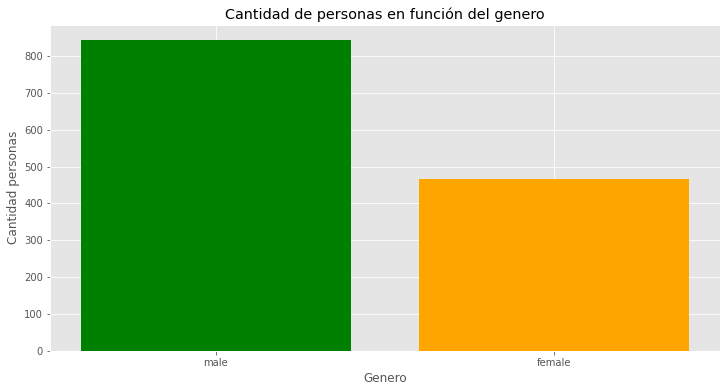

In [79]:
plt.bar(gender_titanic['index'],gender_titanic['Gender'], color = ["green", "orange"])
plt.title("Cantidad de personas en función del genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad personas")
plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


In [ ]:
# your code here


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [3]:
# your code here


#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [ ]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

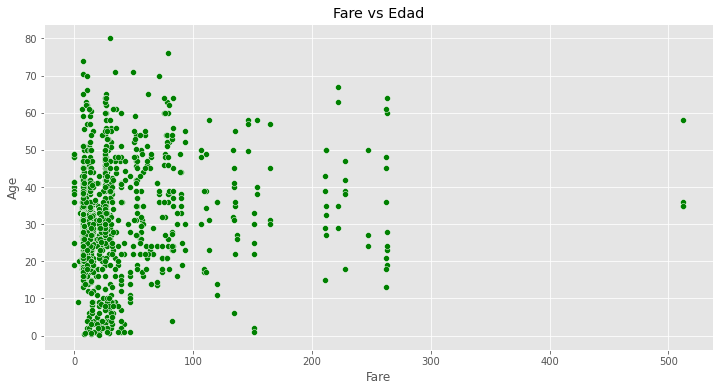

In [82]:
sns.scatterplot(data = titanic, x = "Fare", y = "Age", color = "green")
plt.title("Fare vs Edad")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show();

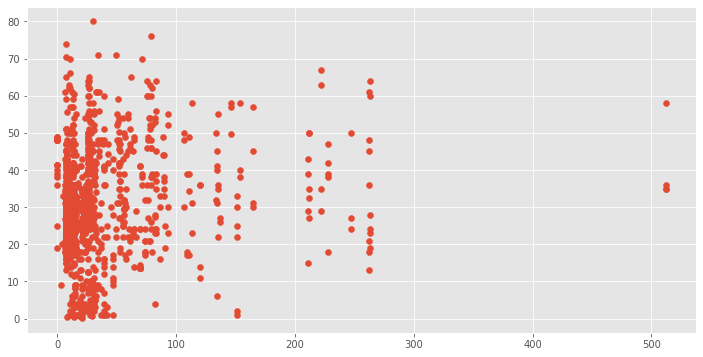

In [118]:
plt.scatter(titanic['Fare'], titanic['Age'])
plt.show();

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

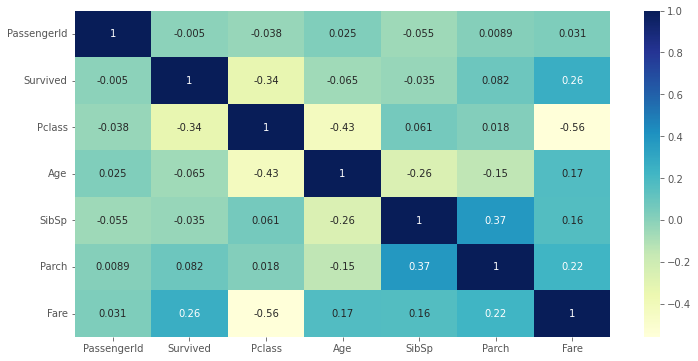

In [116]:
sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot = True);

#### According to the previous plot, what are the most correlated feature? Comment.

Por lo general no hay correlaciones positivas entre las diferentes categorias. Si hay que destacar un relación entre categorias, habría que mencionar a 'Parch' y 'SibSp'. Guardan cierta relación positiva.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

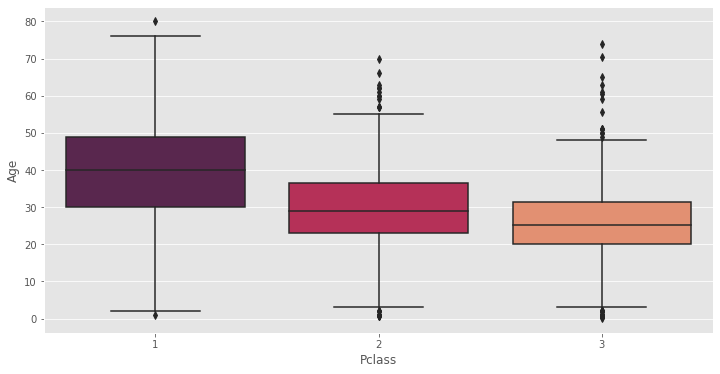

In [117]:
sns.boxplot(data = titanic, x = 'Pclass', y = 'Age', palette = "rocket")

plt.show();

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

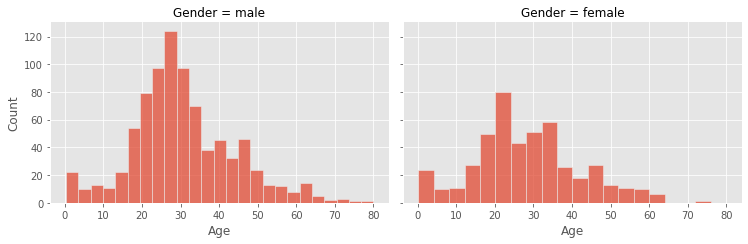

In [115]:
graf = sns.FacetGrid(titanic, col="Gender", height=3.5, aspect=1.5, palette = "green")
graf.map(sns.histplot, "Age");